In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

PATH = "Datasets/"

In [2]:
#food_emissions = pd.read_csv(PATH+"Food_Product_Emissions.csv")
#food_emissions.drop(['Unit of GHG Emissions'],axis=1,inplace=True)

In [3]:
meat_prod = pd.read_csv(PATH+"meat_prod.csv",sep=";")

In [4]:
meat_prod.columns

Index(['Entity', 'Code', 'Year', 'Cattle | Produced', 'Goat | Produced',
       'Chicken | Produced', 'Turkey | Produced', 'Pig | Produced',
       'Lamb and mutton | Produced', 'Meat, Total | tonnes', 'Game | tonnes',
       'Duck | tonnes', 'Horse | tonnes', 'Camel | tonnes',
       'Goose and guinea fowl | tonnes', 'Sheep and goat | tonnes',
       'Beef and buffalo | tonnes', 'Pig | tonnes', 'Poultry | tonnes'],
      dtype='object')

In [5]:
def getLastYear(df,entities):
   new_df = pd.DataFrame()
   for e in entities:
      _tmp = df[df['Entity'] == e].iloc[-1]
      new_df = new_df.append(_tmp)
   return new_df

In [6]:
df = getLastYear(meat_prod,np.unique(meat_prod['Entity']))

In [7]:
meat_prod_tonnes = meat_prod[['Entity','Year','Meat, Total | tonnes', 'Game | tonnes',
       'Duck | tonnes', 'Horse | tonnes', 'Camel | tonnes',
       'Goose and guinea fowl | tonnes', 'Sheep and goat | tonnes',
       'Beef and buffalo | tonnes', 'Pig | tonnes', 'Poultry | tonnes']]
df_tonnes = getLastYear(meat_prod_tonnes,np.unique(meat_prod_tonnes['Entity']))
#df_tonnes.drop([''])

<AxesSubplot:>

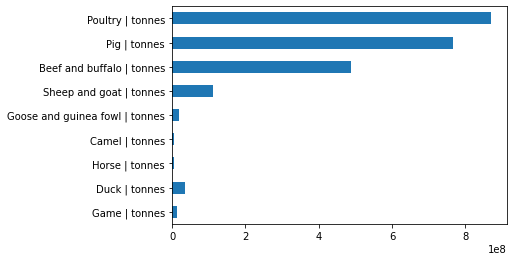

In [8]:
df_tonnes.sum(axis=0).drop(['Entity','Year','Meat, Total | tonnes']).plot.barh()

In [9]:
df_tonnes.drop(['Year'],axis=1,inplace=True)

In [10]:
df.set_index('Entity').to_json("meat_data.json")

In [11]:
df.to_csv("meat_data.csv",sep=";")